# Practice Exercise on Artificial Neural Networks (ANN)

Welcome to the Practice Exercise on Artificial Neural Networks (ANN). In this exercise, we will focus on a classification task where the goal is to predict customer churn. We will work with a dataset to build, train, and evaluate ANN model. This practice will allow you to apply your understanding of neural networks to achieve the best performance.

---

## Dataset Overview

### **Dataset Name:** Telco Customer Churn

### **Description:**  
The dataset contains customer data from a telecommunications company and is used to predict customer churn. Churn refers to customers who stopped using the company's service within the last month. Each row represents a customer, and the dataset includes information about customer demographics, account information, and the services they have signed up for.

### **Features:**
The dataset contains the following columns:

- `customerID`: Unique identifier for the customer.
- `gender`: Gender of the customer (Male, Female).
- `SeniorCitizen`: Whether the customer is a senior citizen (1: Yes, 0: No).
- `Partner`: Whether the customer has a partner (Yes, No).
- `Dependents`: Whether the customer has dependents (Yes, No).
- `tenure`: Number of months the customer has stayed with the company.
- `PhoneService`: Whether the customer has phone service (Yes, No).
- `MultipleLines`: Whether the customer has multiple lines (Yes, No, No phone service).
- `InternetService`: Customer’s internet service provider (DSL, Fiber optic, No).
- `OnlineSecurity`: Whether the customer has online security (Yes, No, No internet service).
- `OnlineBackup`: Whether the customer has online backup (Yes, No, No internet service).
- `DeviceProtection`: Whether the customer has device protection (Yes, No, No internet service).
- `TechSupport`: Whether the customer has tech support (Yes, No, No internet service).
- `StreamingTV`: Whether the customer has streaming TV service (Yes, No, No internet service).
- `StreamingMovies`: Whether the customer has streaming movies service (Yes, No, No internet service).
- `Contract`: The contract term of the customer (Month-to-month, One year, Two year).
- `PaperlessBilling`: Whether the customer has paperless billing (Yes, No).
- `PaymentMethod`: The payment method used by the customer (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)).
- `MonthlyCharges`: The amount charged to the customer monthly.
- `TotalCharges`: The total amount charged to the customer.
- `Churn`: Whether the customer churned (Yes, No).

### **Target Variable:**
- `Churn`: The variable that indicates whether a customer has churned or not.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler, OrdinalEncoder


In [2]:
df = pd.read_csv('Datasets/Telco_Customer_Churn.csv')

## Exploratory Data Analysis (EDA)

* **Inspect the dataset**: The first step is to load the dataset and examine its structure. You will look at the first few rows to ensure it has been correctly loaded and check for basic formatting issues.

* **Dataset structure**: Understand the structure of the dataset, including the number of rows, columns, and data types of each feature. This helps to identify categorical and numerical features and assess the need for data cleaning.

* **Summary statistics**: Generate summary statistics to better understand the distribution of numerical features. This includes measures like mean, median, standard deviation, minimum, and maximum values.

* **Check for missing values**: Identify any missing values in the dataset, as they can influence model performance.

* **Distribution of features**: Plot the distributions of numerical features to identify skewness, outliers, or unusual patterns.

* **Categorical feature analysis**: For categorical variables, count the frequency of each category.

* **Correlation matrix**: Generate a correlation matrix to understand relationships between numerical features.

* **Outlier detection**: Detect and visualize outliers, which can distort the training process. Outliers can be identified using box plots.

And add more as needed!


In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.shape

(7043, 21)

In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


<Axes: ylabel='Frequency'>

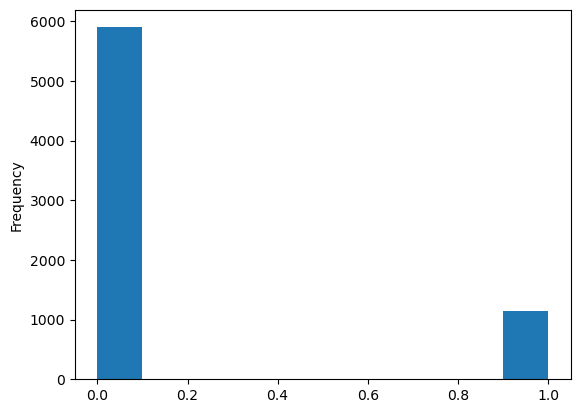

In [9]:
num_cols = df.select_dtypes(exclude=['object']).columns

# df[num_cols].plot(kind='hist',alpha=0.5)

# df['tenure'].plot(kind='hist')
# plt.hist(df['tenure'],kde=True)

df['SeniorCitizen'].plot(kind='hist')

<Axes: ylabel='Frequency'>

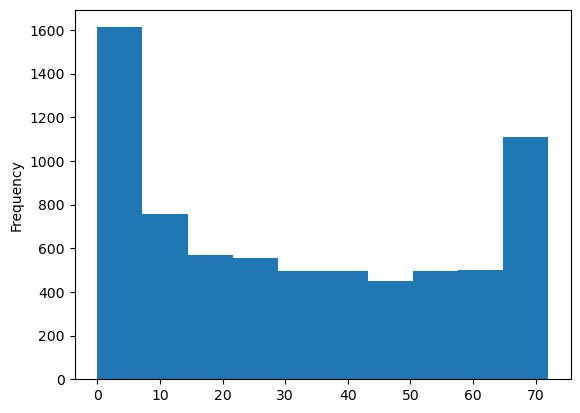

In [10]:
df['tenure'].plot(kind='hist')

<Axes: ylabel='Frequency'>

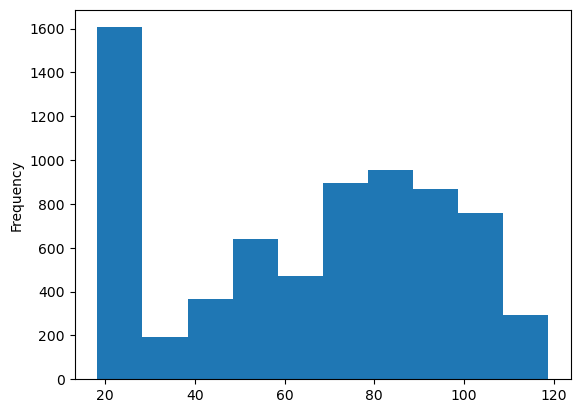

In [11]:
df['MonthlyCharges'].plot(kind='hist')

In [14]:
df['TotalCharges'] = df['TotalCharges'].replace(' ',np.nan)
df['TotalCharges'] = df['TotalCharges'].astype(float)

<Axes: ylabel='Frequency'>

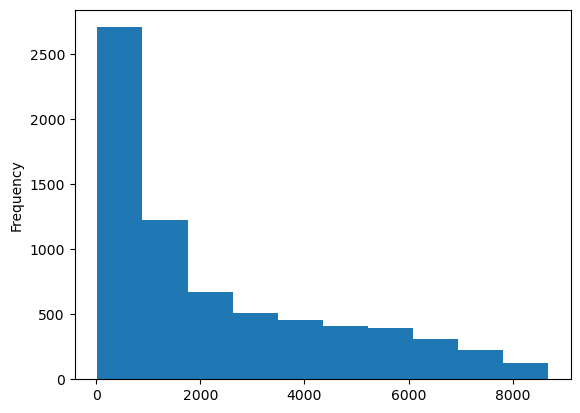

In [15]:
df['TotalCharges'].plot(kind='hist')

In [16]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [17]:
df.dropna(inplace=True)

<Axes: xlabel='gender', ylabel='count'>

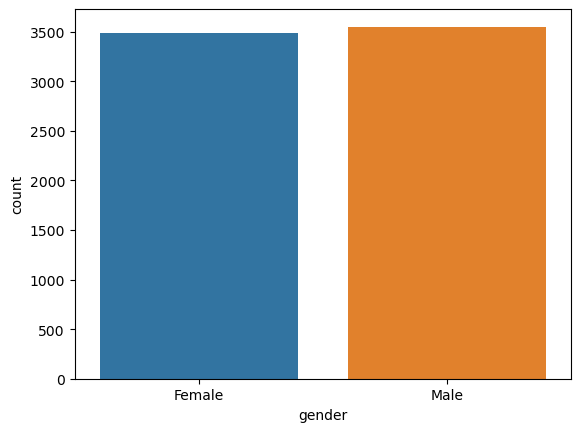

In [18]:
# plt.barplot(df['gender'])
# sns.countplot(df["gender"])

sns.countplot(df, x="gender")



In [19]:
corr_matrix = df[num_cols].corr()
corr_matrix

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.015683,0.219874
tenure,0.015683,1.000000,0.246862
MonthlyCharges,0.219874,0.246862,1.000000


<Axes: >

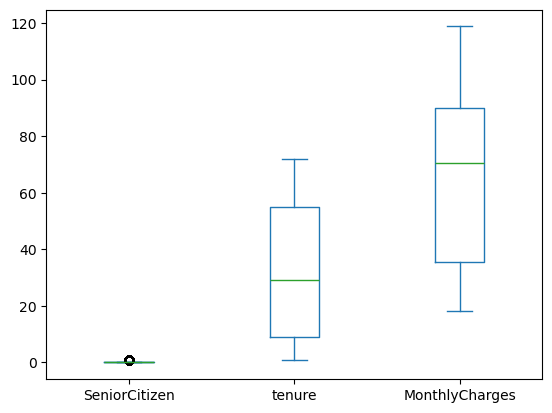

In [20]:
df[num_cols].plot(kind='box')

<Axes: >

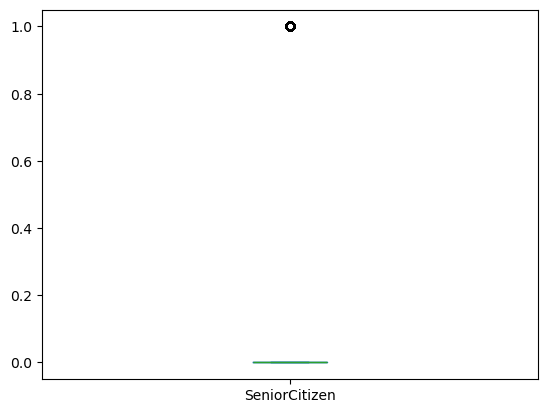

In [21]:
df['SeniorCitizen'].plot(kind='box')

## Data Preprocessing

* **Handling missing values**: If there are any missing values identified during EDA, you must decide how to handle them. Common strategies include removing rows or columns with missing values, or imputing them using methods like the mean, median, or a constant value.

* **Encoding categorical variables**: For machine learning models, categorical variables often need to be converted into numerical representations. Common techniques include:
   - **One-hot encoding**: Converts categorical variables into a series of binary columns.
   - **Label encoding**: Assigns a unique integer to each category.
   
* **Scaling and normalization**: Features often need to be scaled so that all of them contribute equally to the model. Two common techniques include:
   - **Standardization (Z-score scaling)**: Centers the data around a mean of 0 and standard deviation of 1. This is suitable for algorithms that assume normally distributed data, such as neural networks.
   - **Min-Max scaling (Normalization)**: Scales the data to a range (usually between 0 and 1). This technique is useful when the algorithm requires a bounded input range, such as in some neural networks.

* **Feature engineering**: In this step, new features can be created from the existing data to enhance the model’s predictive power. This may include combining features, applying mathematical transformations, or encoding domain-specific information.

* **Handling imbalanced data** (if applicable): If the dataset has imbalanced classes, it may be necessary to apply techniques such as:
   - **Oversampling** the minority class.
   - **Undersampling** the majority class.

And add more as needed!


In [23]:
X = df.drop('Churn', axis=1)
y = df['Churn']

cat_columns = X.select_dtypes(include=['object']).columns
num_columns = X.select_dtypes(exclude=['object']).columns
# Applying OneHotEncoder to categorical columns
ohe = OneHotEncoder(sparse=False)
X_cat_transformed = ohe.fit_transform(X[cat_columns])

# Convert the result back to a DataFrame with appropriate column names
X_cat_df = pd.DataFrame(X_cat_transformed, columns=ohe.get_feature_names_out(cat_columns))

# Standardize the numerical columns
X_num_scaled = StandardScaler().fit_transform(X[num_columns])

# Convert the scaled numeric data back to a DataFrame
X_num_df = pd.DataFrame(X_num_scaled, columns=num_columns)

# Concatenate the one-hot encoded columns and the scaled numerical columns
X_final = pd.concat([X_num_df.reset_index(drop=True), X_cat_df.reset_index(drop=True)], axis=1)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [25]:
y = LabelEncoder().fit_transform(y)

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_final,y,test_size=0.2,random_state=42)

In [57]:
# X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val, test_size=0.2,random_state=42)

In [58]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)                # over-sampling
X_train, y_train = smote.fit_resample(X_train, y_train)

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [59]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

from tensorflow.keras.callbacks import EarlyStopping


import tensorflow as tf

In [60]:
X_train.shape

(8260, 7077)

In [83]:
model = Sequential()


model.add(Flatten())
# Hidden layers
model.add(Dense(units=6,activation='relu',input_shape = (X_train.shape[1],)))
model.add(Dense(units=12,activation='relu'))
model.add(Dense(units=18,activation='relu'))
model.add(Dense(units=24,activation='relu'))


# Output layer
model.add(Dense(units=1,activation='sigmoid'))





/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [84]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metric.

In [85]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['recall'])

In [86]:
# df['Churn'].value_counts()

## Training the Model
Train the ANN model using the training data.

In [87]:
# model.fit(X_train,y_train, epochs=300, validation_date=(X_val,y_val))

history = model.fit(X_train,y_train, epochs=20, validation_split=0.2)

Epoch 1/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5981 - recall: 0.1514 - val_loss: 0.6630 - val_recall: 0.7415
Epoch 2/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4596 - recall: 0.7410 - val_loss: 0.6141 - val_recall: 0.7228
Epoch 3/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3646 - recall: 0.7835 - val_loss: 0.2743 - val_recall: 0.9165
Epoch 4/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - loss: 0.0989 - recall: 0.9647 - val_loss: 0.0117 - val_recall: 1.0000
Epoch 5/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - loss: 0.0078 - recall: 1.0000 - val_loss: 0.0049 - val_recall: 1.0000
Epoch 6/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0024 - recall: 1.0000 - val_loss: 0.0024 - val_recall: 1.0000
Epoch 7/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0013 - recall: 1.0000 - val_loss: 0.0015 - val_recall: 1.0000
Epoch 8/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - loss: 8.1354e-04 - recall: 1.0000 - val_loss: 0.0011 - val_recall: 1.000

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [91]:


model.evaluate(X_test,y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step - loss: 0.5966 - recall: 0.2524


[0.6049933433532715, 0.25668448209762573]

## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [88]:
y_pred = model.predict(X_test) > 0.5

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [89]:
from sklearn.metrics import recall_score

recall_score(y_pred,y_test)

0.5106382978723404

## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

<Axes: >

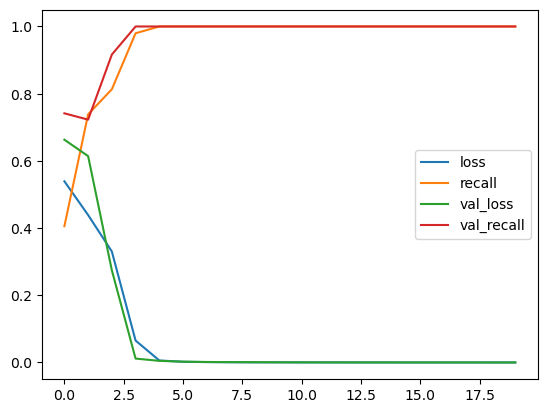

In [92]:
pd.DataFrame(history.history).plot()

## Save the Model
Save the trained model for submission.

In [96]:
model.save('location.keras')

# model.save('blahblah.s')

In [97]:
model2 = tf.keras.models.load_model('location.keras')


In [98]:
model2.evaluate(X_test,y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5966 - recall: 0.2524


[0.6049933433532715, 0.25668448209762573]